In [181]:
import numpy as np
import pandas as pd
import sklearn
print(sklearn.__version__)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2, RFE
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import joblib


1.4.1.post1


In [182]:
#Cargar dataset
df = pd.read_csv('../Dataset_Final.csv', encoding="utf-8")

In [183]:
# Separar las columnas de características y etiquetas
X = df[['Clean_Resume', 'Common Skills']]

df1 =df.copy()
le = LabelEncoder()

le.fit(df['Category'])
df1['Category_num'] = le.transform(df['Category'])
df['Category'] = le.transform(df['Category'])

y= df['Category']


# Obtener el tipo de datos de una columna específica
print("Este es df1",df1['Category_num'])
print("Este es df",df['Category'])
# Convertir las columnas de características a texto
X['Clean_Resume'] = X['Clean_Resume'].astype(str)
X['Common Skills'] = X['Common Skills'].astype(str)

# Obtener el tipo de datos de una columna específica
print(df['Clean_Resume'].dtype)

# Aplicar TfidfVectorizer a las columnas de características
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X['Clean_Resume'] + ' ' + X['Common Skills'])



Este es df1 0       0
1       0
2       0
3       0
4       0
       ..
1247    9
1248    9
1249    9
1250    9
1251    9
Name: Category_num, Length: 1252, dtype: int32
Este es df 0       0
1       0
2       0
3       0
4       0
       ..
1247    9
1248    9
1249    9
1250    9
1251    9
Name: Category, Length: 1252, dtype: int32
object


C:\Users\pepeh\AppData\Local\Temp\ipykernel_5212\3623971525.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Clean_Resume'] = X['Clean_Resume'].astype(str)
C:\Users\pepeh\AppData\Local\Temp\ipykernel_5212\3623971525.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Common Skills'] = X['Common Skills'].astype(str)


In [184]:
# Divide el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25)

In [185]:
# Selecciona características con chi-squared test
'''chi2_scores = chi2(X_train, y_train)
top_features_chi2 = np.argsort(chi2_scores[0])[-10:] #[1] obtener los valores de chi-cuadrado, [0] contiene los valores p(p =  indica la hipotesis 0.05 <)'''

'chi2_scores = chi2(X_train, y_train)\ntop_features_chi2 = np.argsort(chi2_scores[0])[-10:] #[1] obtener los valores de chi-cuadrado, [0] contiene los valores p(p =  indica la hipotesis 0.05 <)'

In [186]:
# Convertir datos dispersos a matriz densa
X_train_dense = X_train.toarray()

mi_scores = []

# Calcular la MI para cada característica
for feature in X_train_dense.T:
    mi_scores.append(mutual_info_score(feature, y_train))

mi_scores = np.array(mi_scores)
top_features_mi = np.argsort(mi_scores)[-50:]

c:\Users\pepeh\Documents\GitHub\TT2\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\pepeh\Documents\GitHub\TT2\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\pepeh\Documents\GitHub\TT2\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\pepeh\Documents\GitHub\TT2\.venv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for la

In [187]:
# Selecciona características con RFE
'''selector = RFE(estimator=SVC(kernel="linear"), n_features_to_select=10)
selector.fit(X_train, y_train)
top_features_rfe = selector.support_
print(selector.ranking_)'''


'selector = RFE(estimator=SVC(kernel="linear"), n_features_to_select=10)\nselector.fit(X_train, y_train)\ntop_features_rfe = selector.support_\nprint(selector.ranking_)'

In [188]:
# Imprime las características seleccionadas
#print(f"Top features chi2: {top_features_chi2}")
print(f"Top features mutual information: {top_features_mi}")
#print(f"Top features RFE: {top_features_rfe}")

Top features mutual information: [ 3117 11713  7569   793  9410  6183  4356 12932  8892 10974  7238  5546
  2924  8656  3285 11036  4352  9712 11513 11762 11039  8838 11744   444
  6816 13555  8523  6351   853  5170 13633 11996  6837 13165   738 10387
  6006 12951 14188 12803  3611 12110 13042  9158  3284  7757 12321  3622
  3555 11626]


In [189]:
# Aplicar esta selección a tus conjuntos de datos
X_train_selected = X_train[:, top_features_mi]
X_test_selected = X_test[:, top_features_mi]
X_train_selected

<939x50 sparse matrix of type '<class 'numpy.float64'>'
	with 15529 stored elements in Compressed Sparse Row format>

In [190]:
# Paso 1: Estandarizar los datos
# Es importante estandarizar los datos antes de aplicar PCA para asegurar que cada característica contribuya equitativamente
#scaler = StandardScaler(with_mean=False)
#X_standardized = scaler.fit_transform(X_train_selected)

In [191]:
# Inicializa y ajusta TruncatedSVD
# Puedes especificar el número de componentes que desees con el parámetro n_components
svd = TruncatedSVD(n_components=14, random_state=42)
X_train_reduced = svd.fit_transform(X_train_selected)


# Luego puedes transformar tu conjunto de prueba con el mismo ajuste
X_test_reduced = svd.transform(X_test_selected)

In [192]:
# Calcular la varianza explicada acumulativa
varianza_explicada_cumulativa = np.cumsum(svd.explained_variance_ratio_)

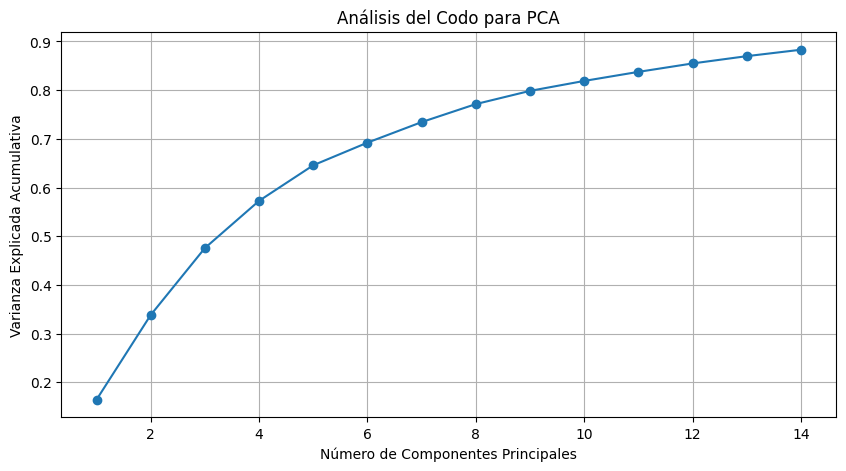

In [193]:
# Graficar la varianza explicada acumulativa
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(varianza_explicada_cumulativa)+1), varianza_explicada_cumulativa, marker='o', linestyle='-')
plt.title('Análisis del Codo para PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.grid(True)
plt.show()

In [194]:
class ModeloClasificador:
    def __init__(self, modelo_path):
        # Carga el modelo entrenado aquí
        self.modelo = joblib.load(modelo_path)
    
    def predecir(self, vectorized_text):
        # Tu código de predicción aquí
        return self.modelo.predict(vectorized_text)

MODELO SVM


In [195]:
from sklearn.svm import SVC

In [196]:
svm_model = SVC(kernel='linear', random_state=42,class_weight='balanced')

In [197]:
svm_model.fit(X_train_reduced, y_train)

SVC(class_weight='balanced', kernel='linear', random_state=42)

In [198]:
from sklearn.metrics import classification_report, confusion_matrix

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(X_test_reduced)

# Ahora vamos a decodificar las etiquetas numéricas a texto en tus predicciones
y_pred_labels = le.inverse_transform(y_pred)

# Decodificar también las etiquetas verdaderas si es necesario
y_test_labels = le.inverse_transform(y_test)

# Ahora calcula el reporte de clasificación usando las etiquetas de texto
reporte = classification_report(y_test_labels, y_pred_labels, output_dict=True)

# Imprimir el reporte de clasificación con etiquetas de texto
print(classification_report(y_test_labels, y_pred_labels))

# Opcional: Imprimir la matriz de confusión
print(confusion_matrix(y_test_labels, y_pred_labels))

                           precision    recall  f1-score   support

               Blockchain       0.92      0.77      0.84        31
             Data Science       1.00      0.88      0.94        25
                 Database       1.00      1.00      1.00        29
          DevOps Engineer       1.00      0.63      0.77        35
         DotNet Developer       1.00      0.95      0.98        21
           Java Developer       0.62      0.91      0.74        35
Network Security Engineer       0.91      0.95      0.93        22
         Python Developer       0.90      1.00      0.95        37
                  Testing       1.00      1.00      1.00        35
            Web Designing       1.00      1.00      1.00        43

                 accuracy                           0.91       313
                macro avg       0.94      0.91      0.91       313
             weighted avg       0.93      0.91      0.91       313

[[24  0  0  0  0  7  0  0  0  0]
 [ 0 22  0  0  0  0  0  3 

In [199]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

# Instanciar el Grid Search
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, refit=True, verbose=2, cv=5)

# Ejecutar el grid search
grid_search.fit(X_train_reduced, y_train)

# Encontrar los mejores hiperparámetros
print(grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

In [200]:
# Guardar el modelo entrenado en un archivo
#joblib.dump(svm_model, 'svm_model.joblib')

MODELO RANDOMFOREST